# $\color{red}{ \textit{CircumCenter}}$


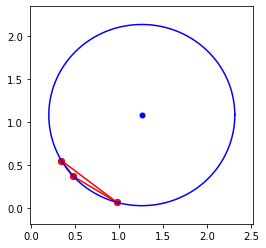

((1.25853, 1.08117), 1.05551)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import sqrt 


class triangle:
    def __init__(self, p1, p2, p3):
        self.p1 = (p1[0], p1[1])
        self.p2 = (p2[0], p2[1])
        self.p3 = (p3[0], p3[1])


R = 1
p1 = ( R*random(), R*random())
p2 = ( R*random(), R*random())
p3 = ( R*random(), R*random())
ST = triangle( p1, p2, p3)


def circumcenter( triang, display = True):
    ax, ay = triang.p1[0], triang.p1[1]
    bx, by = triang.p2[0], triang.p2[1]
    cx, cy = triang.p3[0], triang.p3[1]
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    # if d < epsilon: print( "Points are inline, Can't Calculate a CircumCenter in This Case" )
    c_x = ((ax * ax + ay * ay) * (by - cy) + (bx * bx + by * by) * (cy - ay) + (cx * cx + cy * cy) * (ay - by)) / d
    c_y = ((ax * ax + ay * ay) * (cx - bx) + (bx * bx + by * by) * (ax - cx) + (cx * cx + cy * cy) * (bx - ax)) / d

    radius = sqrt( (c_x - ax)**2 + (c_y - ay)**2 )

    if display:
        plt.figure( figsize=(4,4) )
        plt.plot( [ax,bx], [ay,by], 'ro-')
        plt.plot( [cx,bx], [cy,by], 'ro-')
        plt.plot( [ax,cx], [ay,cy], 'ro-')


        M = 1000
        angle = np.exp(1j * 2 * np.pi / M)
        angles = np.cumprod(np.ones(M + 1) * angle)
        x, y = c_x +  radius * np.real(angles), c_y + radius * np.imag(angles)
        plt.plot( x, y, c='b')
        plt.scatter( [c_x], [c_y], s=25, c= 'b')

        plt.xlim( [ c_x - 1.2*radius, c_x + 1.2*radius] )
        plt.ylim( [ c_y - 1.2*radius, c_y + 1.2*radius] )
        plt.show()    

    return ( round( c_x, 5), round( c_y, 5)), round( radius, 5)


print( circumcenter(ST) )

# $\color{red}{ \textit{Delaunay Triangulation}}$

In [17]:
from math import sqrt


class triangle:
    def __init__(self, p1, p2, p3):
        self.p1 = (p1[0], p1[1])
        self.p2 = (p2[0], p2[1])
        self.p3 = (p3[0], p3[1])

class edge:
    def __init__(self, p1, p2):
        self.p1 = (p1[0], p1[1])
        self.p2 = (p2[0], p2[1])


class Delaunay():
    def __init__(self, R = 10):
        self.mesh = {}
        self.points = []
        # if point aready exist, don't bother adding it!
        self.id = 0
        self.eps = 0.0001

        self.R = R
        self.ST = triangle(  ( 0, R), ( R*sqrt(3)/2, -R/2 ), ( -R*sqrt(3)/2, -R/2 ))

        # self.mesh[self.id] = triangle(  ( 0, R), ( R*sqrt(3)/2, -R/2 ), ( -R*sqrt(3)/2, -R/2 ))
        # self.id += 1
        # self.points.append( ( 0, R) )
        # self.points.append( ( R*sqrt(3)/2, -R/2 ) )
        # self.points.append( ( -R*sqrt(3)/2, -R/2 ) )

        self.mesh[self.id] = triangle(  ( -R, R), ( R, R ), ( R, -R ))
        self.id += 1
        self.mesh[self.id] = triangle(  ( -R, R), ( -R, -R ), ( R, -R ))
        self.id += 1

        self.points.append( ( R, R) )
        self.points.append( ( -R, R) )
        self.points.append( ( R, -R) )
        self.points.append( ( -R, -R) )
    
    def pt_exists(self, _pt):
        flag = 0
        for pt in self.points:
            dist = sqrt( (_pt[0] - pt[0])**2 + (_pt[1] - pt[1])**2 )
            if dist < self.eps: 
                return True
        return False

    def isInCircumcenter( self, _triang, _pt):
        center, radius = circumcenter( _triang, display=False)
        dist = sqrt( (center[0] - _pt[0])**2 + (center[1] - _pt[1])**2 ) 
        if dist < radius:
            return True
        else:
            return False

    def notSharedEdge( self, _badT):
        if len( _badT) == 0:
            return []
        elif len( _badT) == 1:
            polygone = []
            key = list(_badT.keys())[0]
            polygone.append( edge( (_badT[key].p1[0], _badT[key].p1[1]) , (_badT[key].p2[0], _badT[key].p2[1])) )
            polygone.append( edge( (_badT[key].p2[0], _badT[key].p2[1]) , (_badT[key].p3[0], _badT[key].p3[1])) )
            polygone.append( edge( (_badT[key].p3[0], _badT[key].p3[1]) , (_badT[key].p1[0], _badT[key].p1[1])) )
            return polygone

        else:
            polygone = []
            # To Optimize:
            LK = list(_badT.keys())
            for key1 in  list(_badT.keys()):
                T1 = _badT[key1]
                global_flag = 1 # not shared = True
                for key2 in  list(_badT.keys()):
                    T2 = _badT[key2]
                    if key1 != key2:
                        dists = []
                        dists.append( sqrt( (T1.p1[0] - T2.p1[0])**2 + (T1.p1[1] - T2.p1[1])**2 ) + sqrt( (T1.p2[0] - T2.p2[0])**2 + (T1.p2[1] - T2.p2[1])**2 ))
                        dists.append( sqrt( (T1.p1[0] - T2.p2[0])**2 + (T1.p1[1] - T2.p2[1])**2 ) + sqrt( (T1.p2[0] - T2.p1[0])**2 + (T1.p2[1] - T2.p1[1])**2 ))
                        
                        dists.append( sqrt( (T1.p1[0] - T2.p2[0])**2 + (T1.p1[1] - T2.p2[1])**2 ) + sqrt( (T1.p2[0] - T2.p3[0])**2 + (T1.p2[1] - T2.p3[1])**2 ))
                        dists.append( sqrt( (T1.p1[0] - T2.p3[0])**2 + (T1.p1[1] - T2.p3[1])**2 ) + sqrt( (T1.p2[0] - T2.p2[0])**2 + (T1.p2[1] - T2.p2[1])**2 ))

                        dists.append( sqrt( (T1.p1[0] - T2.p3[0])**2 + (T1.p1[1] - T2.p3[1])**2 ) + sqrt( (T1.p2[0] - T2.p1[0])**2 + (T1.p2[1] - T2.p1[1])**2 ))
                        dists.append( sqrt( (T1.p1[0] - T2.p1[0])**2 + (T1.p1[1] - T2.p1[1])**2 ) + sqrt( (T1.p2[0] - T2.p3[0])**2 + (T1.p2[1] - T2.p3[1])**2 ))
                        
                        for dist in dists:
                            if dist < self.eps:
                                global_flag = 0
                                break
                    if global_flag == 0:
                        break
                if global_flag == 1:
                    polygone.append( edge( (T1.p1[0], T1.p1[1]) , (T1.p2[0], T1.p2[1])) )


                global_flag = 1 # not shared = True
                for key2 in  list(_badT.keys()):
                    T2 = _badT[key2]
                    if key1 != key2:
                        dists = []
                        dists.append( sqrt( (T1.p2[0] - T2.p1[0])**2 + (T1.p2[1] - T2.p1[1])**2 ) + sqrt( (T1.p3[0] - T2.p2[0])**2 + (T1.p3[1] - T2.p2[1])**2 ))
                        dists.append( sqrt( (T1.p2[0] - T2.p2[0])**2 + (T1.p2[1] - T2.p2[1])**2 ) + sqrt( (T1.p3[0] - T2.p1[0])**2 + (T1.p3[1] - T2.p1[1])**2 ))
                        
                        dists.append( sqrt( (T1.p2[0] - T2.p2[0])**2 + (T1.p2[1] - T2.p2[1])**2 ) + sqrt( (T1.p3[0] - T2.p3[0])**2 + (T1.p3[1] - T2.p3[1])**2 ))
                        dists.append( sqrt( (T1.p2[0] - T2.p3[0])**2 + (T1.p2[1] - T2.p3[1])**2 ) + sqrt( (T1.p3[0] - T2.p2[0])**2 + (T1.p3[1] - T2.p2[1])**2 ))

                        dists.append( sqrt( (T1.p2[0] - T2.p3[0])**2 + (T1.p2[1] - T2.p3[1])**2 ) + sqrt( (T1.p3[0] - T2.p1[0])**2 + (T1.p3[1] - T2.p1[1])**2 ))
                        dists.append( sqrt( (T1.p2[0] - T2.p1[0])**2 + (T1.p2[1] - T2.p1[1])**2 ) + sqrt( (T1.p3[0] - T2.p3[0])**2 + (T1.p3[1] - T2.p3[1])**2 ))
                        
                        for dist in dists:
                            if dist < self.eps:
                                global_flag = 0
                                break
                    if global_flag == 0:
                        break
                if global_flag == 1:
                    polygone.append( edge( (T1.p2[0], T1.p2[1]) , (T1.p3[0], T1.p3[1])) )


                global_flag = 1 # not shared = True
                for key2 in  list(_badT.keys()):
                    T2 = _badT[key2]
                    if key1 != key2:
                        dists = []
                        dists.append( sqrt( (T1.p3[0] - T2.p1[0])**2 + (T1.p3[1] - T2.p1[1])**2 ) + sqrt( (T1.p1[0] - T2.p2[0])**2 + (T1.p1[1] - T2.p2[1])**2 ))
                        dists.append( sqrt( (T1.p3[0] - T2.p2[0])**2 + (T1.p3[1] - T2.p2[1])**2 ) + sqrt( (T1.p1[0] - T2.p1[0])**2 + (T1.p1[1] - T2.p1[1])**2 ))
                        
                        dists.append( sqrt( (T1.p3[0] - T2.p2[0])**2 + (T1.p3[1] - T2.p2[1])**2 ) + sqrt( (T1.p1[0] - T2.p3[0])**2 + (T1.p1[1] - T2.p3[1])**2 ))
                        dists.append( sqrt( (T1.p3[0] - T2.p3[0])**2 + (T1.p3[1] - T2.p3[1])**2 ) + sqrt( (T1.p1[0] - T2.p2[0])**2 + (T1.p1[1] - T2.p2[1])**2 ))

                        dists.append( sqrt( (T1.p3[0] - T2.p3[0])**2 + (T1.p3[1] - T2.p3[1])**2 ) + sqrt( (T1.p1[0] - T2.p1[0])**2 + (T1.p1[1] - T2.p1[1])**2 ))
                        dists.append( sqrt( (T1.p3[0] - T2.p1[0])**2 + (T1.p3[1] - T2.p1[1])**2 ) + sqrt( (T1.p1[0] - T2.p3[0])**2 + (T1.p1[1] - T2.p3[1])**2 ))
                        
                        for dist in dists:
                            if dist < self.eps:
                                global_flag = 0
                                break
                    if global_flag == 0:
                        break
                if global_flag == 1:
                    polygone.append( edge( (T1.p3[0], T1.p3[1]) , (T1.p1[0], T1.p1[1])) )

            cleanpolygone = []
            for E1 in polygone:
                flag = 1
                for E2 in polygone:
                    dist1 = sqrt( (E1.p1[0] - E2.p1[0])**2 + (E1.p1[1] - E2.p1[1])**2  ) + sqrt( (E1.p2[0] - E2.p2[0])**2 + (E1.p2[1] - E2.p2[1])**2  )
                    dist2 = sqrt( (E1.p1[0] - E2.p2[0])**2 + (E1.p1[1] - E2.p2[1])**2  ) + sqrt( (E1.p2[0] - E2.p1[0])**2 + (E1.p2[1] - E2.p1[1])**2  )
                    if dist1 + dist2 < self.eps:
                        flag = 0
                        break
                if flag == 1:
                    cleanpolygone.append( edge( (E1.p1[0], E1.p1[1]) , (E1.p2[0], E1.p2[1]) ))

            return cleanpolygone


    def add_point(self, pt):
        if not self.pt_exists( (pt[0], pt[1])):
            self.points.append( (pt[0], pt[1]) )
            self.badT = {}
            list_keys = []
            for key in list(self.mesh.keys()):
                T = self.mesh[key]
                # In CircumCircle Garanties Fat Triangles:
                if self.isInCircumcenter( T, pt ):
                    list_keys.append( key )
                    self.badT[key] = triangle( (self.mesh[key].p1[0], self.mesh[key].p1[1]), (self.mesh[key].p2[0], self.mesh[key].p2[1]), (self.mesh[key].p3[0], self.mesh[key].p3[1]) )
            
            polygone = self.notSharedEdge( self.badT)

            # for key in list(badT.keys()):
            for key in list_keys:
                del self.mesh[key]

            for E in polygone:
                self.mesh[ self.id] = triangle( (E.p1[0], E.p1[1]), (pt[0], pt[1]), (E.p2[0], E.p2[1]) )
                self.id += 1

    def display( self ):
        plt.figure( figsize=(8,4) )
        plt.subplot( 1, 2, 1)
        X, Y = [], []
        for pt in self.points:
            X.append( pt[0] )
            Y.append( pt[1] )
        plt.scatter(  X, Y, c='r', s=25)

        plt.subplot( 1, 2, 2)
        for key in list(self.mesh.keys()):
            T = self.mesh[key]
            plt.plot( [T.p1[0], T.p2[0]], [T.p1[1], T.p2[1]], 'g-', linewidth=1)
            plt.plot( [T.p2[0], T.p3[0]], [T.p2[1], T.p3[1]], 'g-', linewidth=1)
            plt.plot( [T.p3[0], T.p1[0]], [T.p3[1], T.p1[1]], 'g-', linewidth=1)
        plt.scatter(  X, Y, c='r', s=25)
        plt.show()


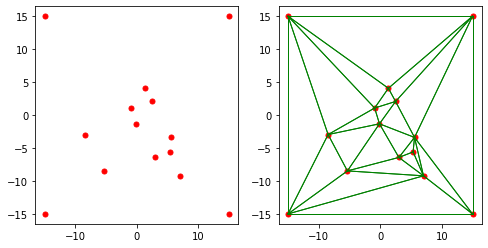

In [28]:
De = Delaunay( R=15 )


pts = []
N = 10
for _ in range( N ):
    x = 2*10*(random()-0.5)
    y = 2*10*(random()-0.5)
    pts.append( (x, y) )

for pt in pts:
    De.add_point( pt ) 

De.display()


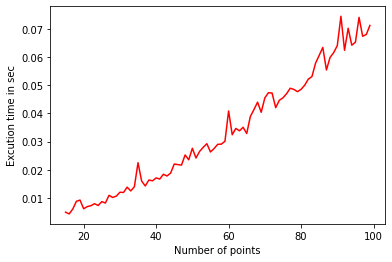

In [6]:
import time

times = []

for N in range(15,100):
    ts = time.time()
    De = Delaunay( R=15 )
    pts = []
    for _ in range( N ):
        x = 2*10*(random()-0.5)
        y = 2*10*(random()-0.5)
        pts.append( (x, y) )

    for pt in pts:
        De.add_point( pt ) 

    te = time.time()
    times.append( te-ts )

plt.plot( [i for i in range(15,100)], times, 'r' )
plt.xlabel( 'Number of points' )
plt.ylabel( 'Excution time in sec' )
plt.show()